In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')/255

In [4]:
Y_train = to_categorical(Y_train, 10).astype('int')
Y_test = to_categorical(Y_test, 10).astype('int')

In [5]:
model = Sequential()                                    #모델설정하기
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
MODEL_DIR = './model_05/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = "./model_05/{epoch:02d}-{val_loss:.4f}.hdf5"

In [9]:
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [10]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.15361, saving model to ./model_05/01-0.1536.hdf5

Epoch 00002: val_loss improved from 0.15361 to 0.10826, saving model to ./model_05/02-0.1083.hdf5

Epoch 00003: val_loss improved from 0.10826 to 0.08410, saving model to ./model_05/03-0.0841.hdf5

Epoch 00004: val_loss improved from 0.08410 to 0.07375, saving model to ./model_05/04-0.0737.hdf5

Epoch 00005: val_loss did not improve from 0.07375

Epoch 00006: val_loss improved from 0.07375 to 0.07079, saving model to ./model_05/06-0.0708.hdf5

Epoch 00007: val_loss improved from 0.07079 to 0.06314, saving model to ./model_05/07-0.0631.hdf5

Epoch 00008: val_loss did not improve from 0.06314

Epoch 00009: val_loss improved from 0.06314 to 0.06017, saving model to ./model_05/09-0.0602.hdf5

Epoch 00010: val_loss improved from 0.06017 to 0.05779, saving model to ./model_05/10-0.0578.hdf5

Epoch 00011: val_loss did not improve from 0.05779

Epoch 00012: val_loss did not improve from 0.05779

Epo

In [12]:
print("Val_loss and Accuracy", (model.evaluate(X_test,Y_test, verbose=0)))

Val_loss and Accuracy [0.07976848757994612, 0.9804]


In [13]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

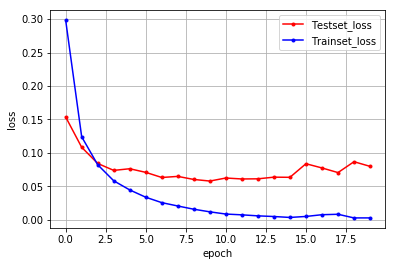

In [16]:
x_len =np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()